In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import streamlit as st
import holidays

In [2]:
# Cargar los archivos CSV de ventas y competencia en DataFrames
ventas_df = pd.read_csv("../data/raw/entrenamiento/ventas.csv")
competencia_df = pd.read_csv("../data/raw/entrenamiento/competencia.csv")

# Imprimir las primeras filas de cada DataFrame para verificar la carga
print("DataFrames cargados exitosamente:")
print("ventas_df.head():")
print(ventas_df.head())
print("\ncompetencia_df.head():")
print(competencia_df.head())

DataFrames cargados exitosamente:
ventas_df.head():
        fecha producto_id                            nombre categoria  \
0  2021-10-25    PROD_001          Nike Air Zoom Pegasus 40   Running   
1  2021-10-25    PROD_002              Adidas Ultraboost 23   Running   
2  2021-10-25    PROD_003               Asics Gel Nimbus 25   Running   
3  2021-10-25    PROD_004  New Balance Fresh Foam X 1080v12   Running   
4  2021-10-25    PROD_005                Nike Dri-FIT Miler   Running   

         subcategoria  precio_base  es_estrella  unidades_vendidas  \
0  Zapatillas Running          115         True                  6   
1  Zapatillas Running          135         True                 10   
2  Zapatillas Running           85        False                  2   
3  Zapatillas Running           75        False                  2   
4        Ropa Running           35        False                  2   

   precio_venta  ingresos  
0        118.36    710.16  
1        136.82   1368.20  
2   

In [3]:
# Informe de Calidad de Datos para ventas_df
print("\n--- Informe de Calidad de Datos para ventas_df ---")

# 1. Información general y tipos de datos
print("\n1. Información general y tipos de datos:")
ventas_df.info()

# 2. Valores nulos
print("\n2. Valores nulos por columna:")
print(ventas_df.isnull().sum())

# 3. Filas duplicadas
print("\n3. Número de filas duplicadas:")
print(ventas_df.duplicated().sum())

# 4. Estadísticas descriptivas
print("\n4. Estadísticas descriptivas para columnas numéricas:")
print(ventas_df.describe())

print("\n--- Fin del Informe de Calidad de Datos ---")


--- Informe de Calidad de Datos para ventas_df ---

1. Información general y tipos de datos:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3552 entries, 0 to 3551
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   fecha              3552 non-null   object 
 1   producto_id        3552 non-null   object 
 2   nombre             3552 non-null   object 
 3   categoria          3552 non-null   object 
 4   subcategoria       3552 non-null   object 
 5   precio_base        3552 non-null   int64  
 6   es_estrella        3552 non-null   bool   
 7   unidades_vendidas  3552 non-null   int64  
 8   precio_venta       3552 non-null   float64
 9   ingresos           3552 non-null   float64
dtypes: bool(1), float64(2), int64(2), object(5)
memory usage: 253.3+ KB

2. Valores nulos por columna:
fecha                0
producto_id          0
nombre               0
categoria            0
subcategoria         0
prec

In [4]:
# Informe de Calidad de Datos para competencia_df
print("\n--- Informe de Calidad de Datos para competencia_df ---")

# 1. Información general y tipos de datos
print("\n1. Información general y tipos de datos:")
competencia_df.info()

# 2. Valores nulos
print("\n2. Valores nulos por columna:")
print(competencia_df.isnull().sum())

# 3. Filas duplicadas
print("\n3. Número de filas duplicadas:")
print(competencia_df.duplicated().sum())

# 4. Estadísticas descriptivas
print("\n4. Estadísticas descriptivas para columnas numéricas:")
print(competencia_df.describe())

print("\n--- Fin del Informe de Calidad de Datos ---")


--- Informe de Calidad de Datos para competencia_df ---

1. Información general y tipos de datos:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3552 entries, 0 to 3551
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   fecha         3552 non-null   object 
 1   producto_id   3552 non-null   object 
 2   Amazon        3552 non-null   float64
 3   Decathlon     3552 non-null   float64
 4   Deporvillage  3552 non-null   float64
dtypes: float64(3), object(2)
memory usage: 138.9+ KB

2. Valores nulos por columna:
fecha           0
producto_id     0
Amazon          0
Decathlon       0
Deporvillage    0
dtype: int64

3. Número de filas duplicadas:
0

4. Estadísticas descriptivas para columnas numéricas:
            Amazon    Decathlon  Deporvillage
count  3552.000000  3552.000000   3552.000000
mean    118.623407   111.412182    118.894628
std     156.095628   148.508132    160.216448
min      16.850000    15.450000  

In [5]:
# Convertir la columna 'fecha' a tipo datetime en ambos DataFrames
ventas_df['fecha'] = pd.to_datetime(ventas_df['fecha'])
competencia_df['fecha'] = pd.to_datetime(competencia_df['fecha'])

print("\n--- Verificación de tipos de datos después de la conversión ---")
print("\nventas_df.info():")
ventas_df.info()
print("\ncompetencia_df.info():")
competencia_df.info()
print("\n--- Fin de la verificación ---")


--- Verificación de tipos de datos después de la conversión ---

ventas_df.info():
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3552 entries, 0 to 3551
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   fecha              3552 non-null   datetime64[ns]
 1   producto_id        3552 non-null   object        
 2   nombre             3552 non-null   object        
 3   categoria          3552 non-null   object        
 4   subcategoria       3552 non-null   object        
 5   precio_base        3552 non-null   int64         
 6   es_estrella        3552 non-null   bool          
 7   unidades_vendidas  3552 non-null   int64         
 8   precio_venta       3552 non-null   float64       
 9   ingresos           3552 non-null   float64       
dtypes: bool(1), datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 253.3+ KB

competencia_df.info():
<class 'pandas.core.frame.DataFra

In [6]:
# Integrar los datos de ventas_df y competencia_df en un nuevo DataFrame llamado df usando 'fecha' y 'producto_id' como claves
# Se utiliza left join para no perder registros de ventas

df = pd.merge(
    ventas_df,
    competencia_df,
    on=['fecha', 'producto_id'],
    how='inner'
)

# Mostrar las primeras filas 
df.head()

,fecha,producto_id,nombre,categoria,subcategoria,precio_base,es_estrella,unidades_vendidas,precio_venta,ingresos,Amazon,Decathlon,Deporvillage
0,2021-10-25,PROD_001,Nike Air Zoom Pegasus 40,Running,Zapatillas Running,115,True,6,118.36,710.16,82.96,111.88,97.43
1,2021-10-25,PROD_002,Adidas Ultraboost 23,Running,Zapatillas Running,135,True,10,136.82,1368.20,112.56,108.61,115.58
2,2021-10-25,PROD_003,Asics Gel Nimbus 25,Running,Zapatillas Running,85,False,2,84.93,169.86,79.79,78.44,80.11
3,2021-10-25,PROD_004,New Balance Fresh Foam X 1080v12,Running,Zapatillas Running,75,False,2,75.42,150.84,72.60,67.29,74.45
4,2021-10-25,PROD_005,Nike Dri-FIT Miler,Running,Ropa Running,35,False,2,35.87,71.74,37.71,33.60,33.07


## Análisis Exploratorio Completo de df

In [7]:
# Información general del DataFrame df
print("\n--- Información General de df ---")
print(f"Forma del DataFrame: {df.shape}")
print(f"\nTipos de datos:")
print(df.dtypes)
print(f"\nValores nulos:")
print(df.isnull().sum())
print(f"\nEstadísticas descriptivas:")
print(df.describe())
print("\n--- Fin de la Información General ---")


--- Información General de df ---
Forma del DataFrame: (3552, 13)

Tipos de datos:
fecha                datetime64[ns]
producto_id                  object
nombre                       object
categoria                    object
subcategoria                 object
precio_base                   int64
es_estrella                    bool
unidades_vendidas             int64
precio_venta                float64
ingresos                    float64
Amazon                      float64
Decathlon                   float64
Deporvillage                float64
dtype: object

Valores nulos:
fecha                0
producto_id          0
nombre               0
categoria            0
subcategoria         0
precio_base          0
es_estrella          0
unidades_vendidas    0
precio_venta         0
ingresos             0
Amazon               0
Decathlon            0
Deporvillage         0
dtype: int64

Estadísticas descriptivas:
                               fecha  precio_base  unidades_vendidas  \
count 

In [8]:
# Preparar datos para análisis de series de tiempo por año
df['año'] = df['fecha'].dt.year
df['mes'] = df['fecha'].dt.month
df['dia_semana'] = df['fecha'].dt.day_name()
df['dia_semana_num'] = df['fecha'].dt.dayofweek

# Obtener fechas de Black Friday usando la librería holidays
# Black Friday es el cuarto viernes de noviembre (en España)
es_holidays = holidays.Spain(years=df['año'].unique())
black_fridays = []
for año in df['año'].unique():
    # Encontrar el cuarto viernes de noviembre
    for día in range(22, 30):  # Black Friday está generalmente entre 22-29 de noviembre
        fecha_candidata = pd.Timestamp(year=año, month=11, day=día)
        if fecha_candidata.weekday() == 4:  # 4 = viernes
            black_fridays.append(fecha_candidata)
            break

print(f"Black Fridays identificados: {black_fridays}")

Black Fridays identificados: [Timestamp('2021-11-26 00:00:00'), Timestamp('2022-11-25 00:00:00'), Timestamp('2023-11-24 00:00:00'), Timestamp('2024-11-22 00:00:00')]


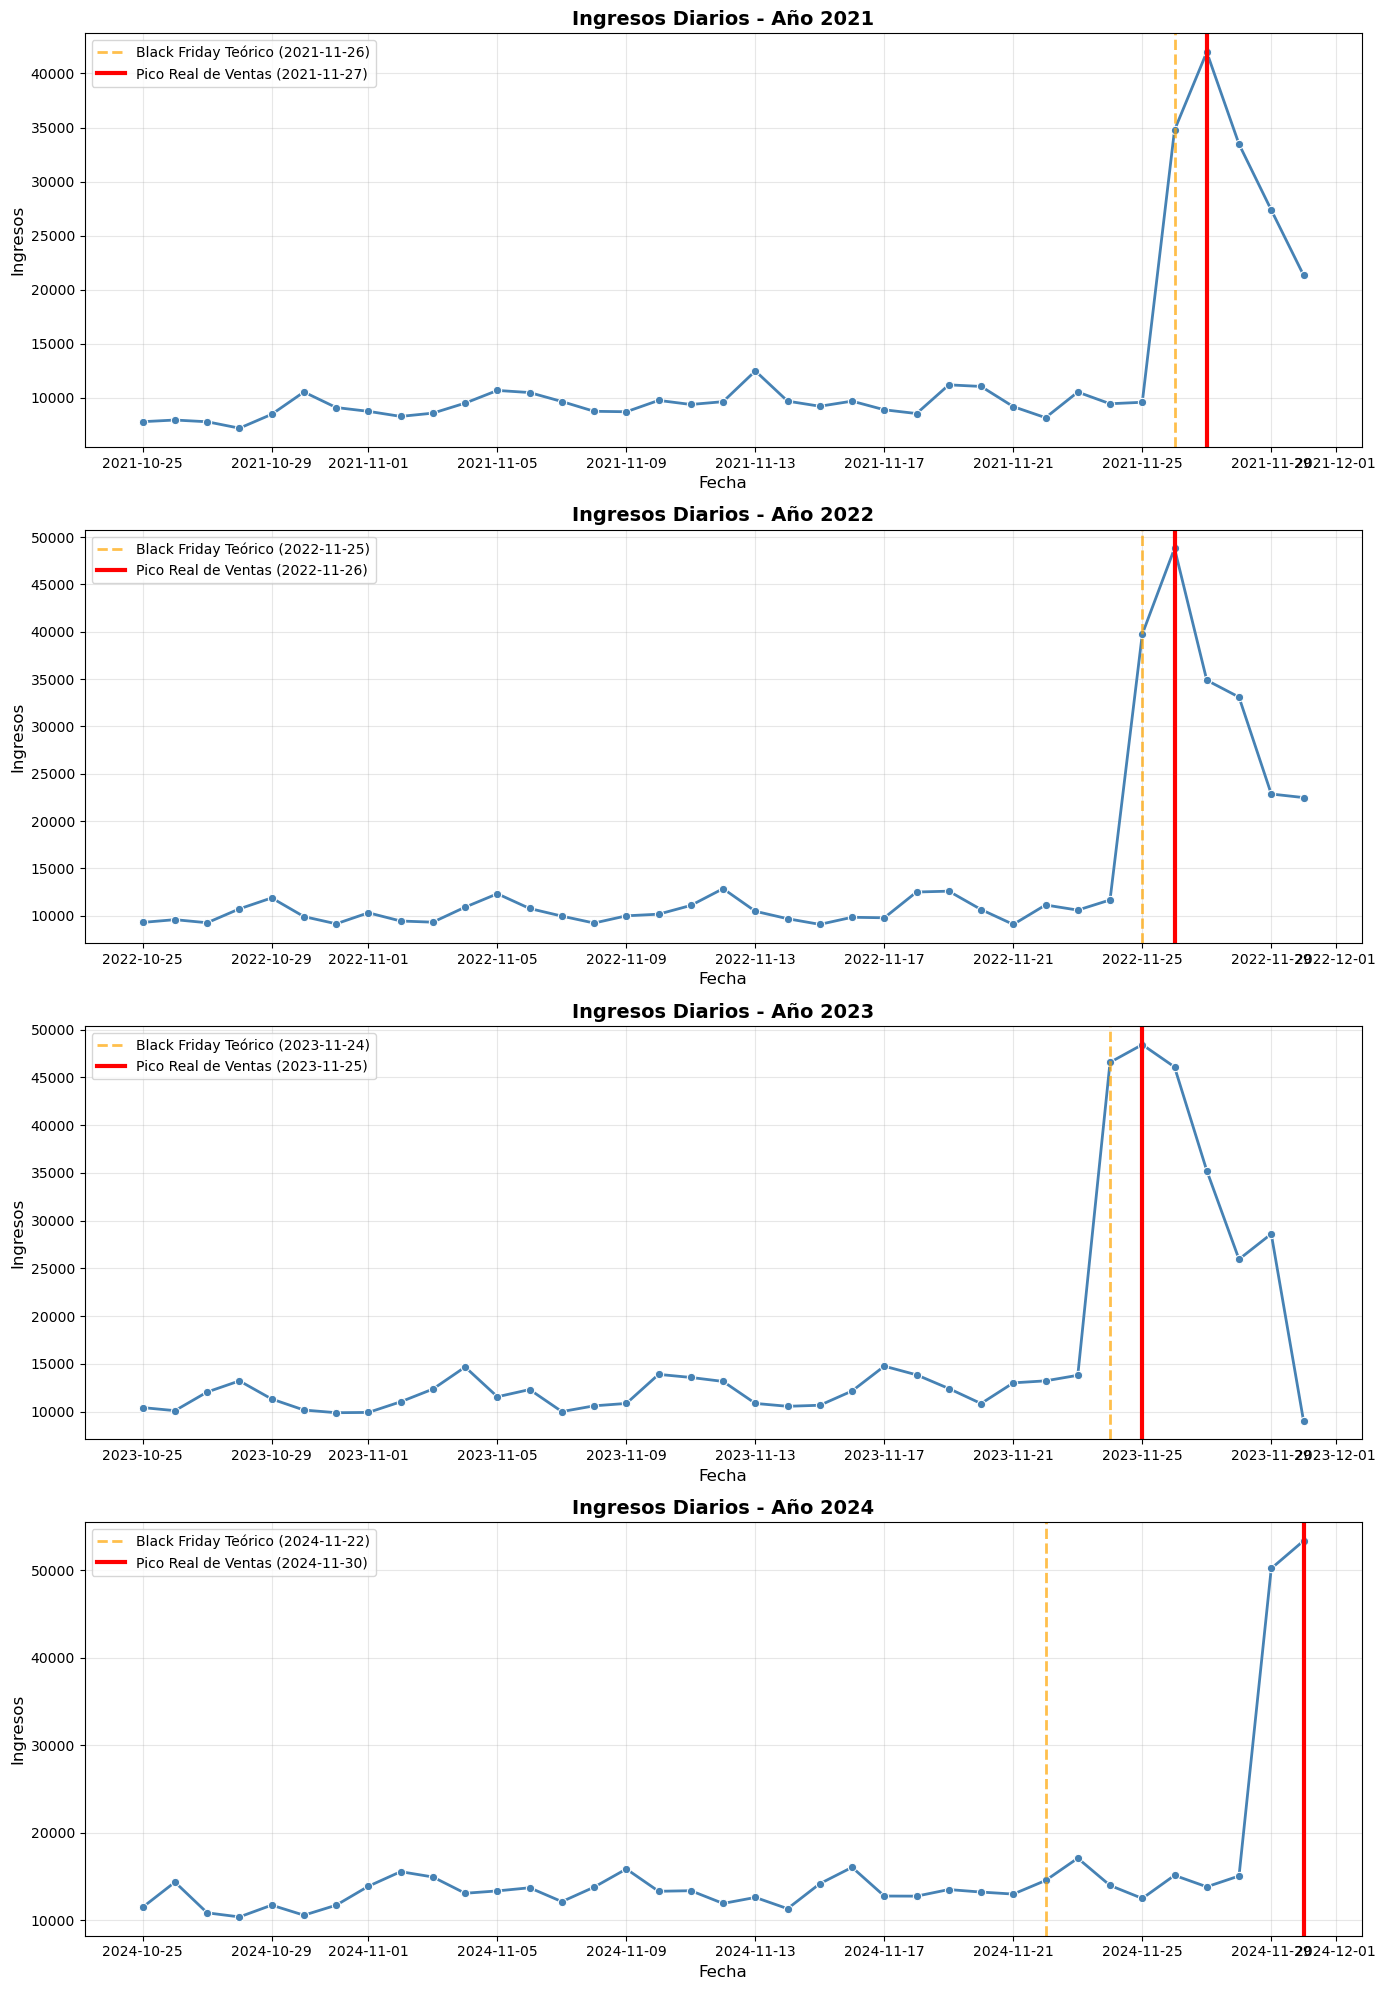

In [9]:
# Gráficos de ingresos por día para cada año con Black Fridays y Cyber Mondays marcados
años = sorted(df['año'].unique())
num_años = len(años)

fig, axes = plt.subplots(num_años, 1, figsize=(14, 5 * num_años))
if num_años == 1:
    axes = [axes]

# Crear diccionario con eventos de mayor venta por año (detectados automáticamente)
eventos_mayor_venta = {}
for año in años:
    df_año = df[df['año'] == año].copy()
    ingresos_por_dia = df_año.groupby('fecha')['ingresos'].sum().reset_index()
    fecha_max = ingresos_por_dia.loc[ingresos_por_dia['ingresos'].idxmax(), 'fecha']
    eventos_mayor_venta[año] = fecha_max

for idx, año in enumerate(años):
    df_año = df[df['año'] == año].copy()
    
    # Agrupar por fecha y sumar los ingresos
    ingresos_por_dia = df_año.groupby('fecha')['ingresos'].sum().reset_index()
    
    sns.lineplot(data=ingresos_por_dia, x='fecha', y='ingresos', ax=axes[idx], marker='o', linewidth=2, color='steelblue')
    
    # Marcar Black Friday (teórico)
    for bf in black_fridays:
        if bf.year == año:
            axes[idx].axvline(x=bf, color='orange', linestyle='--', linewidth=2, label=f'Black Friday Teórico ({bf.date()})', alpha=0.7)
    
    # Marcar fecha real de mayor venta
    fecha_max_venta = eventos_mayor_venta[año]
    axes[idx].axvline(x=fecha_max_venta, color='red', linestyle='-', linewidth=3, label=f'Pico Real de Ventas ({fecha_max_venta.date()})')
    
    axes[idx].set_title(f'Ingresos Diarios - Año {año}', fontsize=14, fontweight='bold')
    axes[idx].set_xlabel('Fecha', fontsize=12)
    axes[idx].set_ylabel('Ingresos', fontsize=12)
    axes[idx].grid(True, alpha=0.3)
    axes[idx].legend(loc='upper left')

plt.tight_layout()
plt.show()

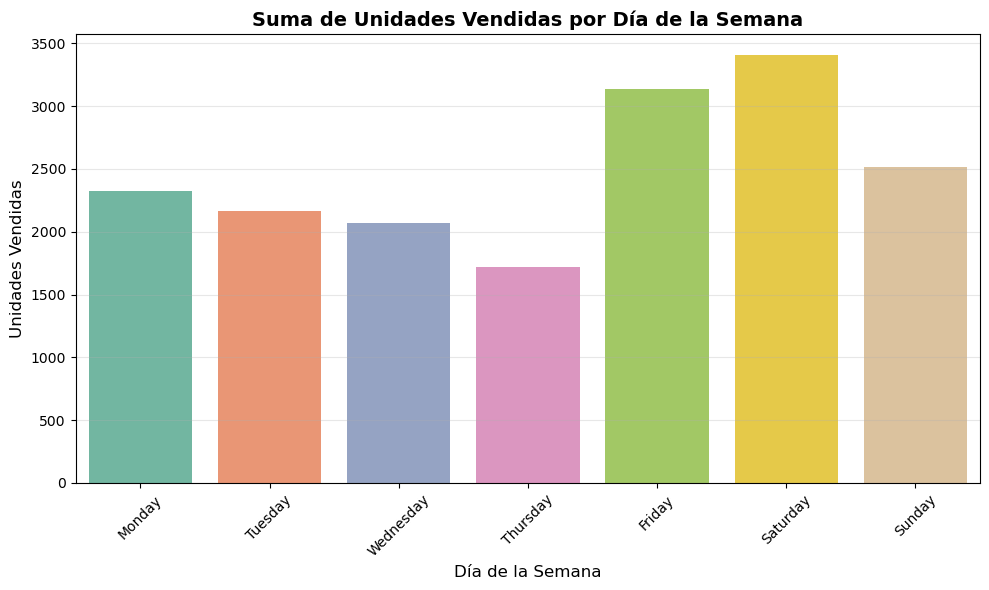

In [10]:
# Suma de unidades vendidas por día de la semana
plt.figure(figsize=(10, 6))
orden_dias = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
unidades_por_dia_semana = df.groupby('dia_semana')['unidades_vendidas'].sum().reindex(orden_dias)

df_dias = pd.DataFrame({
    'Día': orden_dias,
    'Unidades': unidades_por_dia_semana.values
})

sns.barplot(data=df_dias, x='Día', y='Unidades', hue='Día', palette='Set2', legend=False)
plt.xticks(rotation=45)
plt.title('Suma de Unidades Vendidas por Día de la Semana', fontsize=14, fontweight='bold')
plt.xlabel('Día de la Semana', fontsize=12)
plt.ylabel('Unidades Vendidas', fontsize=12)
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

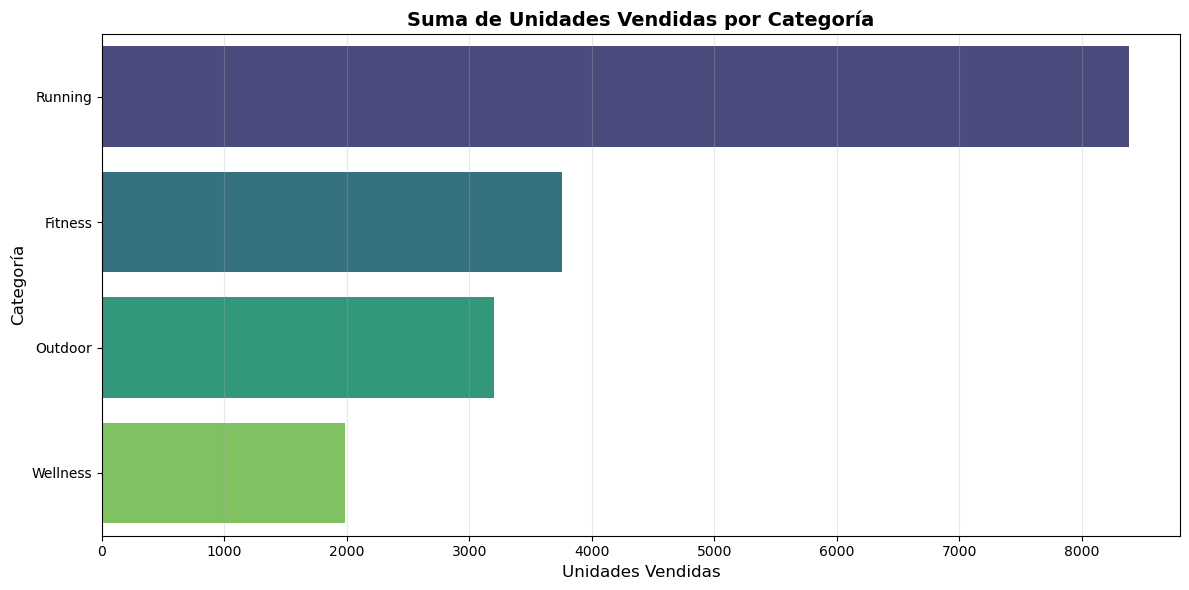

In [11]:
# Suma de unidades vendidas por categoría
plt.figure(figsize=(12, 6))
unidades_por_categoria = df.groupby('categoria')['unidades_vendidas'].sum().sort_values(ascending=False)

df_categoria = pd.DataFrame({
    'Categoría': unidades_por_categoria.index,
    'Unidades': unidades_por_categoria.values
})

sns.barplot(data=df_categoria, x='Unidades', y='Categoría', hue='Categoría', palette='viridis', legend=False)
plt.title('Suma de Unidades Vendidas por Categoría', fontsize=14, fontweight='bold')
plt.xlabel('Unidades Vendidas', fontsize=12)
plt.ylabel('Categoría', fontsize=12)
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

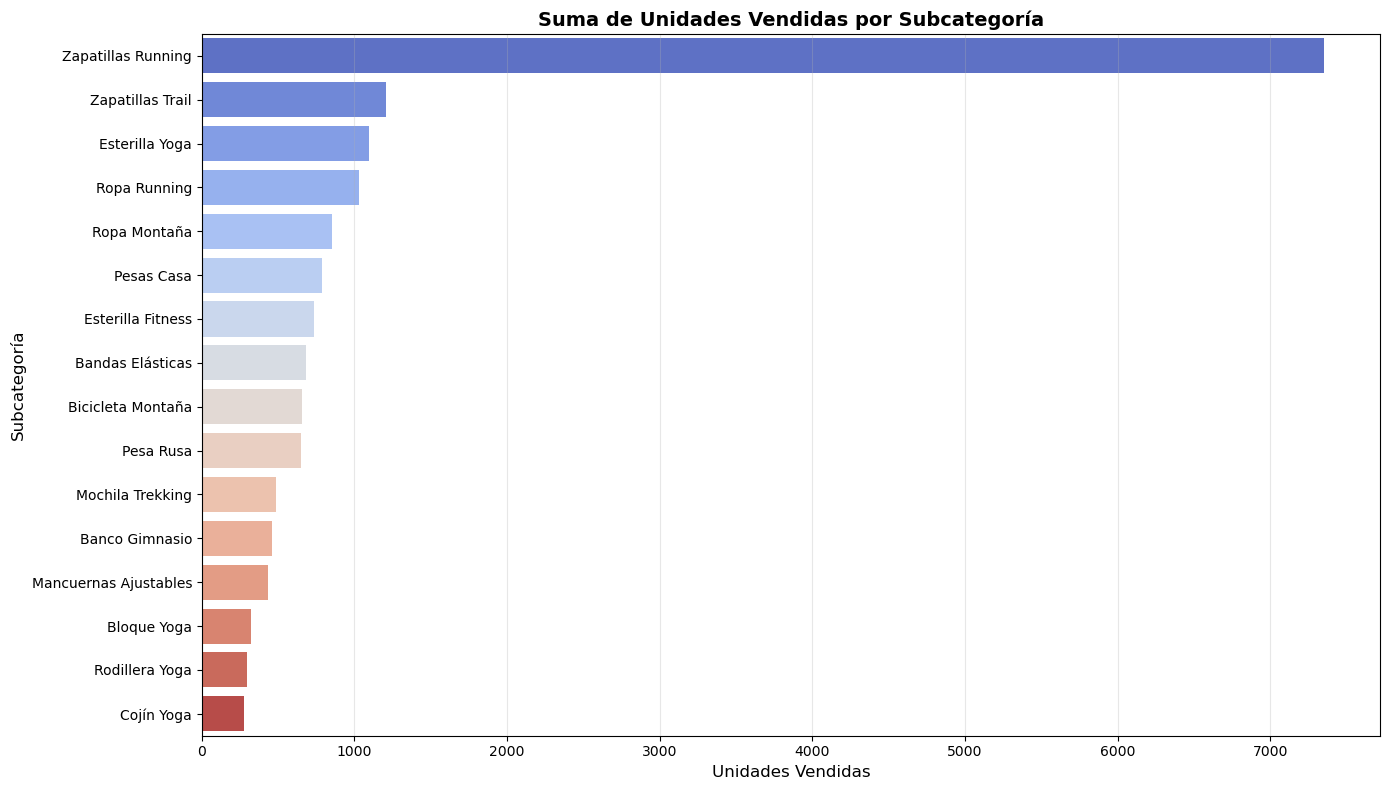

In [12]:
# Suma de unidades vendidas por subcategoría
plt.figure(figsize=(14, 8))
unidades_por_subcategoria = df.groupby('subcategoria')['unidades_vendidas'].sum().sort_values(ascending=False)

df_subcategoria = pd.DataFrame({
    'Subcategoría': unidades_por_subcategoria.index,
    'Unidades': unidades_por_subcategoria.values
})

sns.barplot(data=df_subcategoria, x='Unidades', y='Subcategoría', hue='Subcategoría', palette='coolwarm', legend=False)
plt.title('Suma de Unidades Vendidas por Subcategoría', fontsize=14, fontweight='bold')
plt.xlabel('Unidades Vendidas', fontsize=12)
plt.ylabel('Subcategoría', fontsize=12)
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

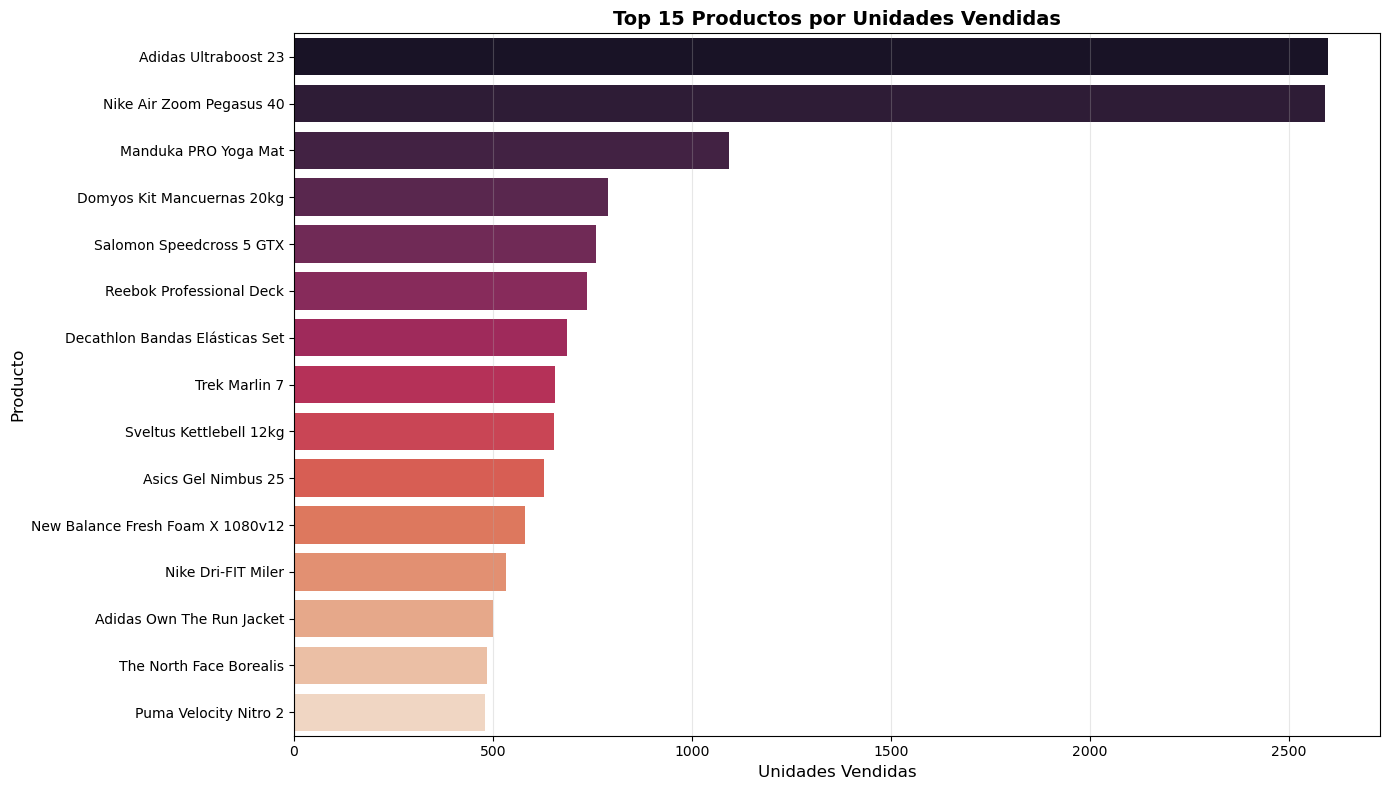

In [13]:
# Top 15 productos por unidades vendidas
plt.figure(figsize=(14, 8))
top_productos = df.groupby('nombre')['unidades_vendidas'].sum().sort_values(ascending=False).head(15)

df_productos = pd.DataFrame({
    'Producto': top_productos.index,
    'Unidades': top_productos.values
})

sns.barplot(data=df_productos, x='Unidades', y='Producto', hue='Producto', palette='rocket', legend=False)
plt.title('Top 15 Productos por Unidades Vendidas', fontsize=14, fontweight='bold')
plt.xlabel('Unidades Vendidas', fontsize=12)
plt.ylabel('Producto', fontsize=12)
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

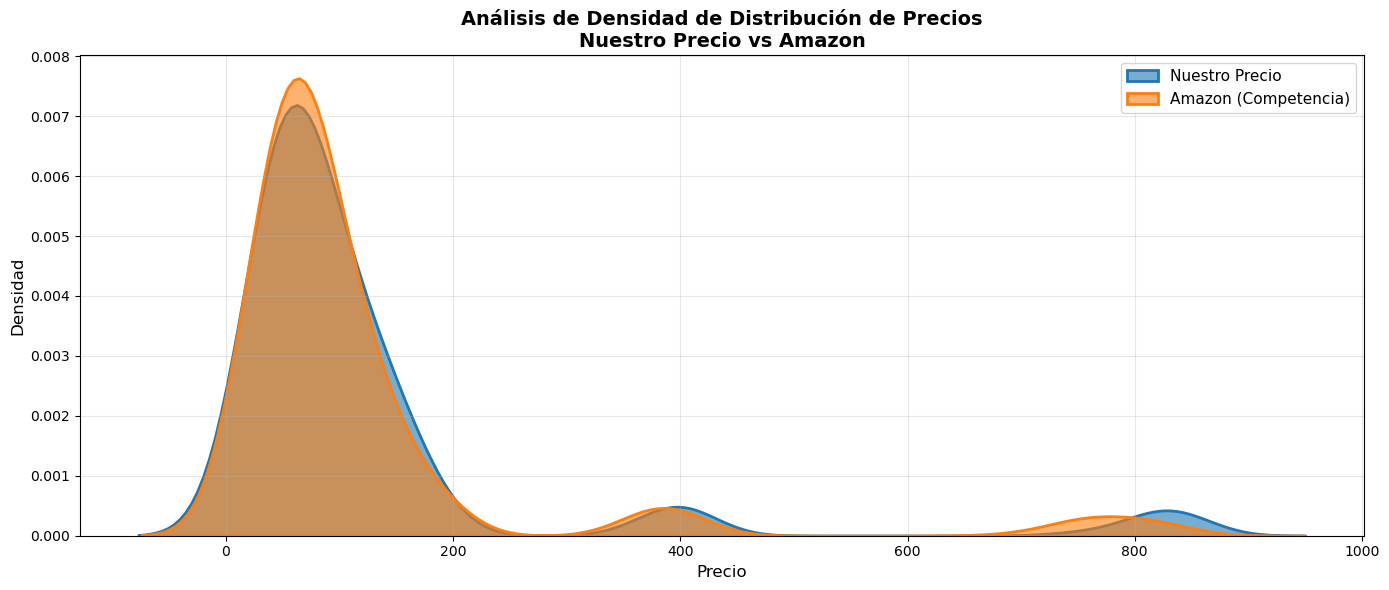

In [14]:
# Análisis de densidad de distribución de precios: precio_venta vs Amazon
plt.figure(figsize=(14, 6))

# Crear gráfico de densidad para precio_venta
sns.kdeplot(data=df, x='precio_venta', label='Nuestro Precio', fill=True, alpha=0.6, linewidth=2)

# Crear gráfico de densidad para precio de Amazon
sns.kdeplot(data=df, x='Amazon', label='Amazon (Competencia)', fill=True, alpha=0.6, linewidth=2)

plt.title('Análisis de Densidad de Distribución de Precios\nNuestro Precio vs Amazon', fontsize=14, fontweight='bold')
plt.xlabel('Precio', fontsize=12)
plt.ylabel('Densidad', fontsize=12)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [15]:
# Crear variables temporales y de calendario en df
# Año, mes, día del mes, día de la semana, nombre del día, es fin de semana, es festivo, es Black Friday, es Cyber Monday, es Navidad, es Año Nuevo, semana del año, trimestre, etc.

df['año'] = df['fecha'].dt.year

df['mes'] = df['fecha'].dt.month
df['mes_nombre'] = df['fecha'].dt.month_name()
df['dia_mes'] = df['fecha'].dt.day
df['dia_semana'] = df['fecha'].dt.dayofweek  # 0=Lunes, 6=Domingo
df['nombre_dia_semana'] = df['fecha'].dt.day_name()
df['semana_año'] = df['fecha'].dt.isocalendar().week
df['trimestre'] = df['fecha'].dt.quarter

df['es_fin_semana'] = df['dia_semana'].isin([5, 6])  # Sábado o Domingo

# Festivos en España (usando holidays)
es_holidays = holidays.Spain(years=df['año'].unique())
df['es_festivo'] = df['fecha'].isin(es_holidays)

# Black Friday: cuarto viernes de noviembre
def es_black_friday(fecha):
    if fecha.month == 11 and fecha.weekday() == 4:
        # Cuarto viernes de noviembre
        if 22 <= fecha.day <= 28:
            return True
    return False

df['es_black_friday'] = df['fecha'].apply(es_black_friday)

# Cyber Monday: lunes siguiente a Black Friday
def es_cyber_monday(fecha):
    if fecha.month == 11 and fecha.weekday() == 0:
        # Cyber Monday es el lunes después del cuarto viernes de noviembre
        if 25 <= fecha.day <= 31:
            # Buscar el Black Friday anterior
            black_friday = fecha - pd.Timedelta(days=3)
            if es_black_friday(black_friday):
                return True
    return False

df['es_cyber_monday'] = df['fecha'].apply(es_cyber_monday)

# Navidad y Año Nuevo
df['es_navidad'] = (df['fecha'].dt.month == 12) & (df['fecha'].dt.day == 25)
df['es_ano_nuevo'] = (df['fecha'].dt.month == 1) & (df['fecha'].dt.day == 1)

# Día de Reyes (6 de enero)
df['es_reyes'] = (df['fecha'].dt.month == 1) & (df['fecha'].dt.day == 6)

# Semana Santa (festivos variables, ejemplo: Viernes Santo)
# Usar holidays para detectar si la fecha es festivo nacional de Semana Santa
df['es_semana_santa'] = df['fecha'].isin([d for d in es_holidays if 'Santo' in es_holidays[d]])

# Primer día del mes
df['es_primer_dia_mes'] = df['dia_mes'] == 1
# Último día del mes
df['es_ultimo_dia_mes'] = df['fecha'] == df['fecha'] + pd.offsets.MonthEnd(0)

# Mostrar las primeras filas para verificar
df.head()

C:\Users\Alexi\AppData\Local\Temp\ipykernel_9036\3714855612.py:18: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  df['es_festivo'] = df['fecha'].isin(es_holidays)
C:\Users\Alexi\AppData\Local\Temp\ipykernel_9036\3714855612.py:52: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  df['es_semana_santa'] = df['fecha'].isin([d for d in es_holidays if 'Santo' in es_holidays[d]])


,fecha,producto_id,nombre,categoria,subcategoria,precio_base,es_estrella,unidades_vendidas,precio_venta,ingresos,...,es_fin_semana,es_festivo,es_black_friday,es_cyber_monday,es_navidad,es_ano_nuevo,es_reyes,es_semana_santa,es_primer_dia_mes,es_ultimo_dia_mes
0,2021-10-25,PROD_001,Nike Air Zoom Pegasus 40,Running,Zapatillas Running,115,True,6,118.36,710.16,...,False,False,False,False,False,False,False,False,False,False
1,2021-10-25,PROD_002,Adidas Ultraboost 23,Running,Zapatillas Running,135,True,10,136.82,1368.20,...,False,False,False,False,False,False,False,False,False,False
2,2021-10-25,PROD_003,Asics Gel Nimbus 25,Running,Zapatillas Running,85,False,2,84.93,169.86,...,False,False,False,False,False,False,False,False,False,False
3,2021-10-25,PROD_004,New Balance Fresh Foam X 1080v12,Running,Zapatillas Running,75,False,2,75.42,150.84,...,False,False,False,False,False,False,False,False,False,False
4,2021-10-25,PROD_005,Nike Dri-FIT Miler,Running,Ropa Running,35,False,2,35.87,71.74,...,False,False,False,False,False,False,False,False,False,False


In [16]:
# Crear lags de unidades_vendidas (lag1 a lag7) y media móvil de 7 días, por año
# No mezclar los registros de diferentes años

def crear_lags_y_media(df, col_lag, lags, media_window, grupo):
    df = df.sort_values(['año', 'fecha']).copy()
    for lag in range(1, lags+1):
        df[f'{col_lag}_lag{lag}'] = df.groupby(grupo)[col_lag].shift(lag)
    df[f'{col_lag}_media_movil_{media_window}d'] = df.groupby(grupo)[col_lag].transform(lambda x: x.rolling(media_window).mean())
    return df

# Aplicar la función
df = crear_lags_y_media(df, 'unidades_vendidas', lags=7, media_window=7, grupo='año')

# Eliminar registros con nulos en los nuevos lags o media móvil
df = df.dropna(subset=[f'unidades_vendidas_lag{i}' for i in range(1,8)] + ['unidades_vendidas_media_movil_7d'])

# Mostrar las primeras filas para verificar
print(df.head())

        fecha producto_id                      nombre categoria  \
7  2021-10-25    PROD_008   Reebok Floatride Energy 5   Running   
8  2021-10-25    PROD_009      Bowflex SelectTech 552   Fitness   
9  2021-10-25    PROD_010                Domyos BM900   Fitness   
10 2021-10-25    PROD_011    Reebok Professional Deck   Fitness   
11 2021-10-25    PROD_012  Domyos Kit Mancuernas 20kg   Fitness   

             subcategoria  precio_base  es_estrella  unidades_vendidas  \
7      Zapatillas Running           65        False                  2   
8   Mancuernas Ajustables          400         True                  2   
9          Banco Gimnasio          175         True                  2   
10      Esterilla Fitness           45        False                  3   
11             Pesas Casa           55        False                  3   

    precio_venta  ingresos  ...  es_primer_dia_mes  es_ultimo_dia_mes  \
7          66.60    133.20  ...              False              False   
8     

In [17]:
# Crear variable de descuento porcentual respecto al precio base
# descuento_porcentaje = ((precio_venta - precio_base) / precio_base) * 100
df['descuento_porcentaje'] = ((df['precio_venta'] - df['precio_base']) / df['precio_base']) * 100

# Mostrar las primeras filas para verificar
df[['fecha', 'precio_base', 'precio_venta', 'descuento_porcentaje']].head()

,fecha,precio_base,precio_venta,descuento_porcentaje
7,2021-10-25,65,66.60,2.461538
8,2021-10-25,400,392.31,-1.922500
9,2021-10-25,175,174.92,-0.045714
10,2021-10-25,45,44.32,-1.511111
11,2021-10-25,55,55.05,0.090909


In [18]:
# 🤖 Crear variable precio_competencia como el promedio de Amazon, Decathlon y Deporvillage
competidores = ['Amazon', 'Decathlon', 'Deporvillage']
df['precio_competencia'] = df[competidores].mean(axis=1)

# Crear variable ratio_precio como nuestro precio_venta dividido por el precio promedio de la competencia
df['ratio_precio'] = df['precio_venta'] / df['precio_competencia']

# Eliminar las columnas de los competidores
df = df.drop(columns=competidores)

# Mostrar las primeras filas para verificar
df[['precio_venta', 'precio_competencia', 'ratio_precio']].head()

,precio_venta,precio_competencia,ratio_precio
7,66.60,64.346667,1.035019
8,392.31,350.850000,1.118170
9,174.92,160.156667,1.092181
10,44.32,44.563333,0.994540
11,55.05,53.246667,1.033868


In [19]:
# 🤖 Crear copias de las variables nombre, categoria y subcategoria con sufijo _h
df['nombre_h'] = df['nombre']
df['categoria_h'] = df['categoria']
df['subcategoria_h'] = df['subcategoria']

# One hot encoding sobre nombre_h, categoria_h y subcategoria_h
df = pd.get_dummies(df, columns=['nombre_h', 'categoria_h', 'subcategoria_h'])

df.head()

,fecha,producto_id,nombre,categoria,subcategoria,precio_base,es_estrella,unidades_vendidas,precio_venta,ingresos,...,subcategoria_h_Esterilla Yoga,subcategoria_h_Mancuernas Ajustables,subcategoria_h_Mochila Trekking,subcategoria_h_Pesa Rusa,subcategoria_h_Pesas Casa,subcategoria_h_Rodillera Yoga,subcategoria_h_Ropa Montaña,subcategoria_h_Ropa Running,subcategoria_h_Zapatillas Running,subcategoria_h_Zapatillas Trail
7,2021-10-25,PROD_008,Reebok Floatride Energy 5,Running,Zapatillas Running,65,False,2,66.60,133.20,...,False,False,False,False,False,False,False,False,True,False
8,2021-10-25,PROD_009,Bowflex SelectTech 552,Fitness,Mancuernas Ajustables,400,True,2,392.31,784.62,...,False,True,False,False,False,False,False,False,False,False
9,2021-10-25,PROD_010,Domyos BM900,Fitness,Banco Gimnasio,175,True,2,174.92,349.84,...,False,False,False,False,False,False,False,False,False,False
10,2021-10-25,PROD_011,Reebok Professional Deck,Fitness,Esterilla Fitness,45,False,3,44.32,132.96,...,False,False,False,False,False,False,False,False,False,False
11,2021-10-25,PROD_012,Domyos Kit Mancuernas 20kg,Fitness,Pesas Casa,55,False,3,55.05,165.15,...,False,False,False,False,True,False,False,False,False,False


In [20]:
# 🤖 Guardar el DataFrame df en la carpeta data/processed
df.to_csv('../data/processed/df.csv', index=False)

In [21]:
# 🤖 Dividir df en train_df (2021-2023) y validation_df (2024), mostrar cantidad de registros en cada uno
train_df = df[df['año'].isin([2021, 2022, 2023])].copy()
validation_df = df[df['año'] == 2024].copy()
print(f'Registros en train_df (2021-2023): {len(train_df)}')
print(f'Registros en validation_df (2024): {len(validation_df)}')

Registros en train_df (2021-2023): 2643
Registros en validation_df (2024): 881


In [22]:
# 🤖 Entrenamiento y validación de HistGradientBoostingRegressor con baseline naive
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Seleccionar variables predictoras (excluyendo fecha, ingresos y tipo object)
target = 'unidades_vendidas'
excluir = ['fecha', 'ingresos']
X_cols = [col for col in train_df.columns if col not in excluir + [target] and train_df[col].dtype != 'O']

X_train = train_df[X_cols]
y_train = train_df[target]
X_val = validation_df[X_cols]
y_val = validation_df[target]

# Modelo conservador para evitar overfitting
hgb = HistGradientBoostingRegressor(
    learning_rate=0.05,
    max_iter=400,
    max_depth=7,
    l2_regularization=1.0,
    random_state=42
)

hgb.fit(X_train, y_train)

# Predicciones
y_pred = hgb.predict(X_val)

# Baseline naive: predice la media de train
y_pred_naive = np.full_like(y_val, y_train.mean(), dtype=float)

# Métricas
def print_metrics(y_true, y_pred, nombre):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    print(f"\nMétricas para {nombre}:")
    print(f"MAE: {mae:.2f}")
    print(f"MSE: {mse:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"R2: {r2:.3f}")

print_metrics(y_val, y_pred, 'HistGradientBoostingRegressor')
print_metrics(y_val, y_pred_naive, 'Baseline Naive (media)')


Métricas para HistGradientBoostingRegressor:
MAE: 0.71
MSE: 2.13
RMSE: 1.46
R2: 0.945

Métricas para Baseline Naive (media):
MAE: 3.34
MSE: 39.09
RMSE: 6.25
R2: -0.000


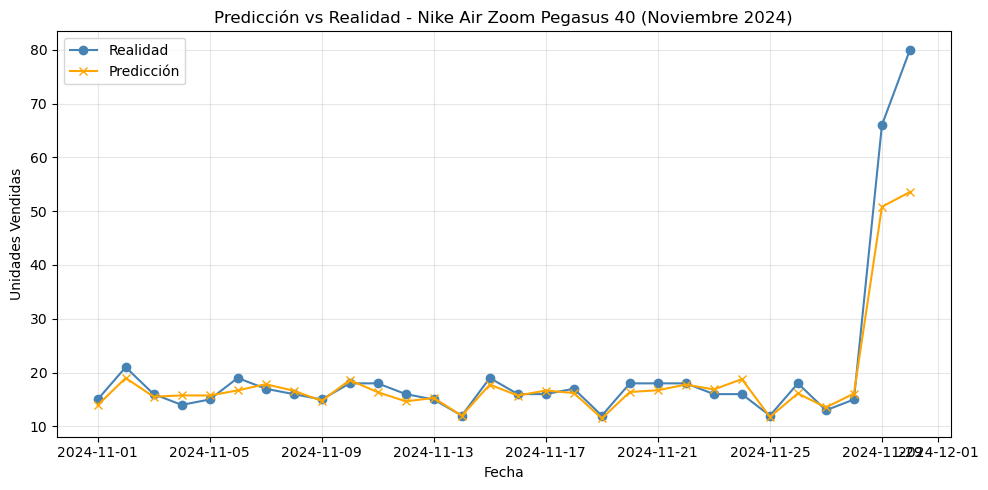

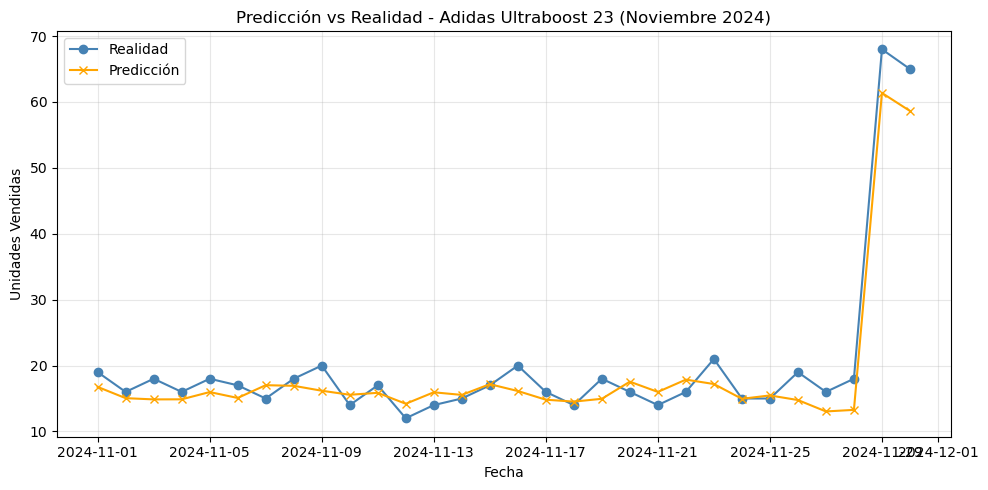

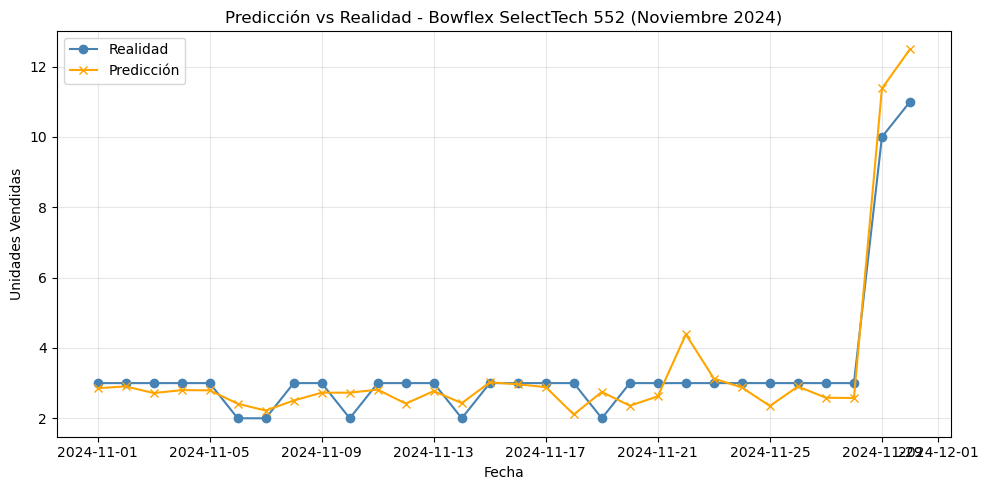

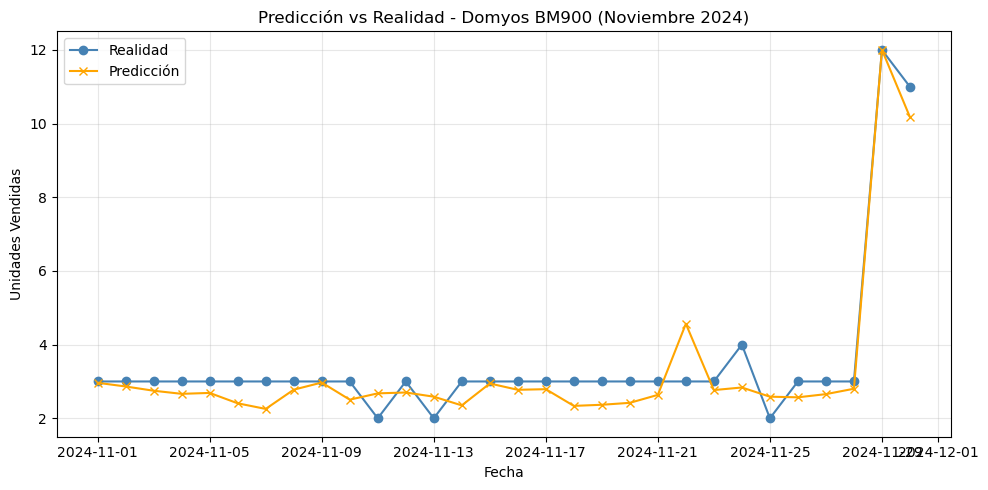

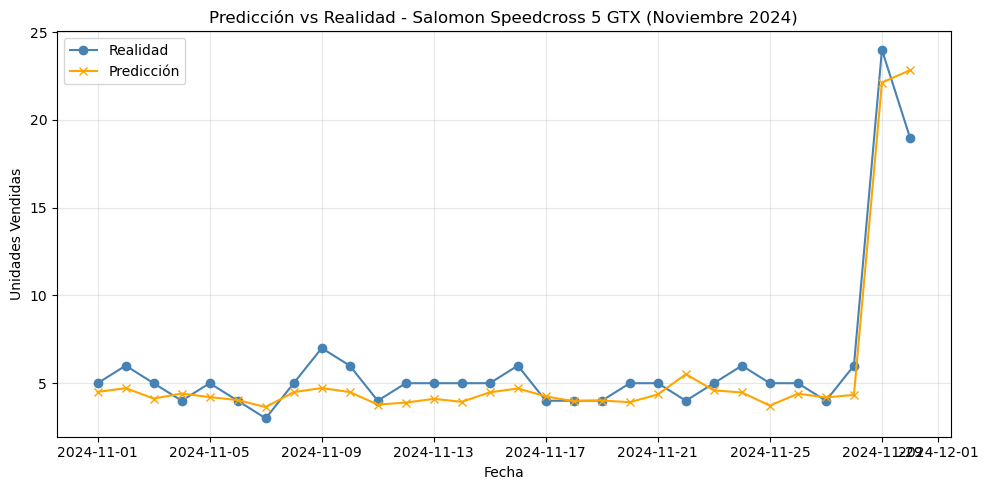

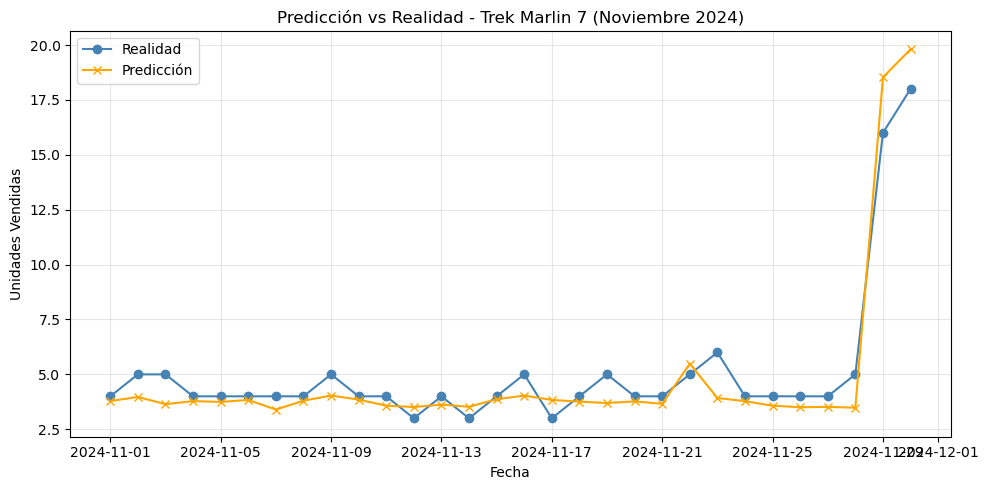

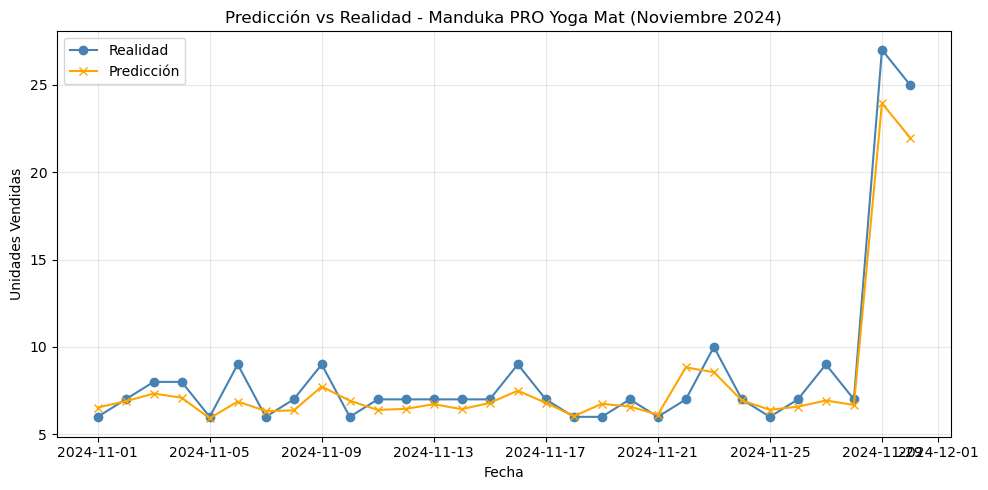

In [23]:
# 🤖 Predicciones para noviembre 2024 de los 7 productos estrella y gráficos comparativos
import matplotlib.pyplot as plt
import seaborn as sns

# Filtrar noviembre 2024 y productos estrella
df_nov2024 = df[(df['año'] == 2024) & (df['mes'] == 11) & (df['es_estrella'] == 1)].copy()
productos_estrella = df_nov2024['nombre'].unique()

# Preparar X para predicción (usar las mismas columnas que en el entrenamiento)
X_nov2024 = df_nov2024[X_cols]
df_nov2024['prediccion'] = hgb.predict(X_nov2024)

# Graficar para cada producto estrella
for producto in productos_estrella:
    datos = df_nov2024[df_nov2024['nombre'] == producto].sort_values('fecha')
    plt.figure(figsize=(10, 5))
    plt.plot(datos['fecha'], datos['unidades_vendidas'], marker='o', label='Realidad', color='steelblue')
    plt.plot(datos['fecha'], datos['prediccion'], marker='x', label='Predicción', color='orange')
    plt.title(f'Predicción vs Realidad - {producto} (Noviembre 2024)')
    plt.xlabel('Fecha')
    plt.ylabel('Unidades Vendidas')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

Nike Air Zoom Pegasus 40 - Periodo 1-10: MAE=1.07, MSE=1.59, RMSE=1.26, R2=0.625
Nike Air Zoom Pegasus 40 - Periodo 11-20: MAE=0.83, MSE=1.01, RMSE=1.00, R2=0.802
Nike Air Zoom Pegasus 40 - Periodo 21-30: MAE=5.05, MSE=94.47, RMSE=9.72, R2=0.824
Adidas Ultraboost 23 - Periodo 1-10: MAE=1.99, MSE=4.71, RMSE=2.17, R2=-0.523
Adidas Ultraboost 23 - Periodo 11-20: MAE=1.62, MSE=3.85, RMSE=1.96, R2=0.179
Adidas Ultraboost 23 - Periodo 21-30: MAE=3.31, MSE=15.55, RMSE=3.94, R2=0.961
Bowflex SelectTech 552 - Periodo 1-10: MAE=0.31, MSE=0.13, RMSE=0.35, R2=0.401
Bowflex SelectTech 552 - Periodo 11-20: MAE=0.39, MSE=0.24, RMSE=0.49, R2=-0.496
Bowflex SelectTech 552 - Periodo 21-30: MAE=0.65, MSE=0.70, RMSE=0.84, R2=0.922
Domyos BM900 - Periodo 1-10: MAE=0.32, MSE=0.15, RMSE=0.39, R2=0.000
Domyos BM900 - Periodo 11-20: MAE=0.46, MSE=0.26, RMSE=0.51, R2=-0.618
Domyos BM900 - Periodo 21-30: MAE=0.57, MSE=0.54, RMSE=0.73, R2=0.955
Salomon Speedcross 5 GTX - Periodo 1-10: MAE=0.88, MSE=1.16, RMSE=1.0

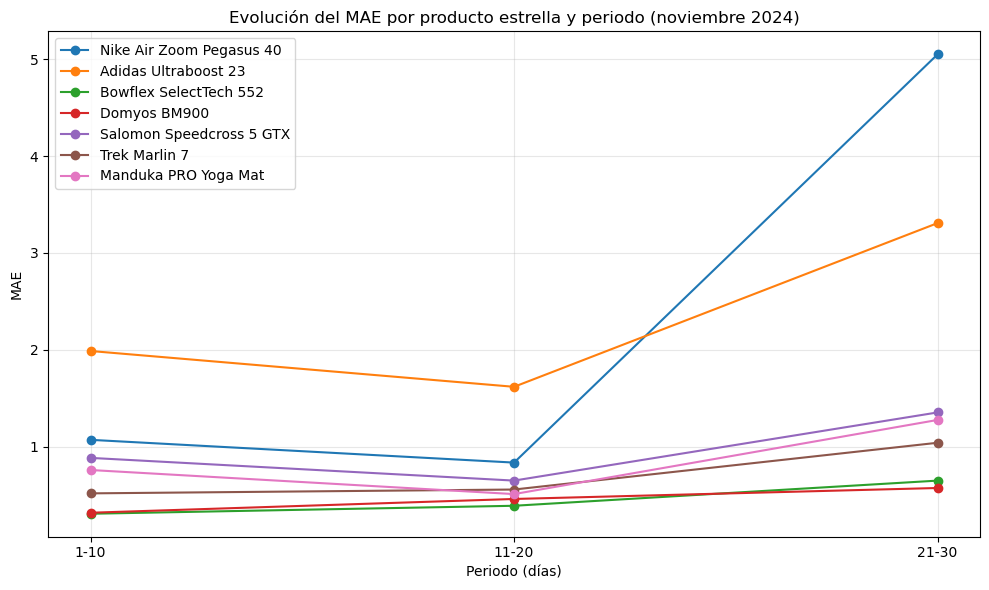

In [24]:
# 🤖 Analiza la degradación del error por producto estrella y periodo en noviembre 2024
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Crear columna de periodo (1: 1-10, 2: 11-20, 3: 21-30)
df_nov2024['periodo'] = pd.cut(df_nov2024['dia_mes'], bins=[0,10,20,31], labels=['1-10','11-20','21-30'])

metricas_productos_periodo = []
for producto in productos_estrella:
    datos_prod = df_nov2024[df_nov2024['nombre'] == producto]
    for periodo in ['1-10','11-20','21-30']:
        datos = datos_prod[datos_prod['periodo'] == periodo]
        if len(datos) > 0:
            mae = mean_absolute_error(datos['unidades_vendidas'], datos['prediccion'])
            mse = mean_squared_error(datos['unidades_vendidas'], datos['prediccion'])
            rmse = np.sqrt(mse)
            r2 = r2_score(datos['unidades_vendidas'], datos['prediccion'])
            metricas_productos_periodo.append({'producto': producto, 'periodo': periodo, 'MAE': mae, 'MSE': mse, 'RMSE': rmse, 'R2': r2})
            print(f"{producto} - Periodo {periodo}: MAE={mae:.2f}, MSE={mse:.2f}, RMSE={rmse:.2f}, R2={r2:.3f}")

# Graficar la evolución del MAE por producto
metricas_prod_df = pd.DataFrame(metricas_productos_periodo)
plt.figure(figsize=(10,6))
for producto in productos_estrella:
    datos = metricas_prod_df[metricas_prod_df['producto'] == producto]
    plt.plot(datos['periodo'], datos['MAE'], marker='o', label=producto)
plt.title('Evolución del MAE por producto estrella y periodo (noviembre 2024)')
plt.xlabel('Periodo (días)')
plt.ylabel('MAE')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


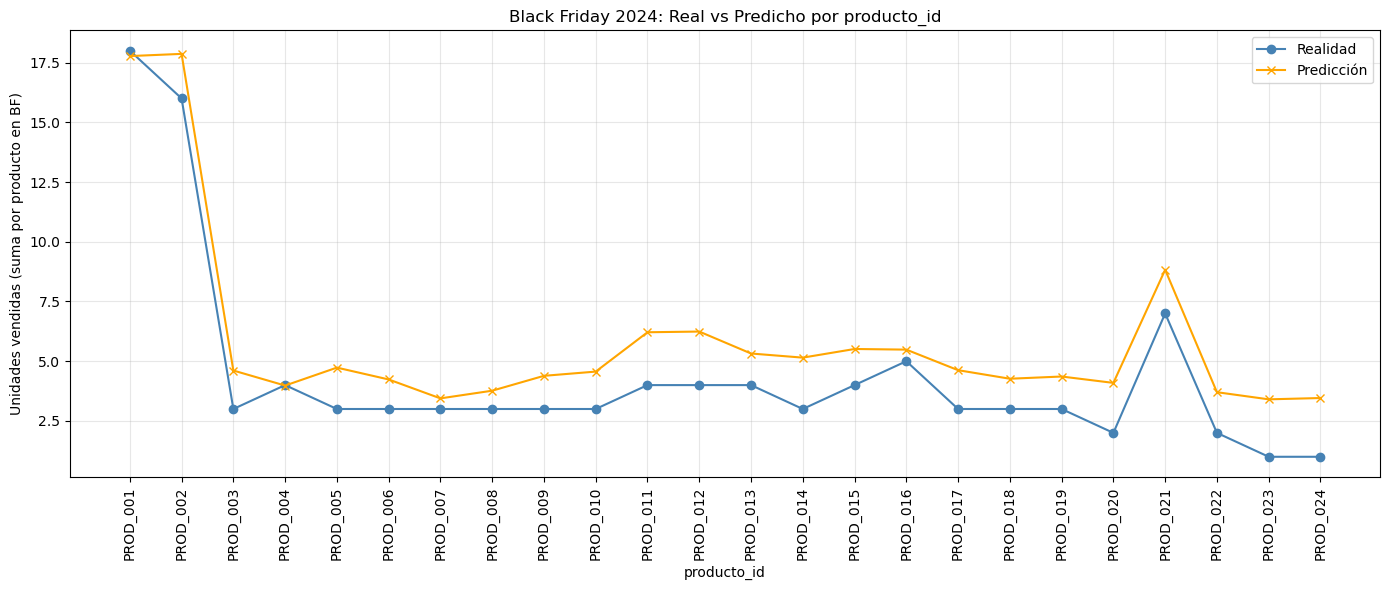

In [25]:
# 🤖 Análisis Black Friday 2024: real vs predicho por producto_id
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1) Calcular la fecha de Black Friday 2024 (cuarto viernes de noviembre)
black_friday_2024 = None
for dia in range(22, 30):
    fecha_cand = pd.Timestamp(year=2024, month=11, day=dia)
    if fecha_cand.weekday() == 4:  # viernes
        black_friday_2024 = fecha_cand
        break

if black_friday_2024 is None:
    raise ValueError('No se pudo determinar Black Friday 2024')

# 2) Filtrar registros de esa fecha
df_bf = df[df['fecha'] == black_friday_2024].copy()

if df_bf.empty:
    print(f'No hay registros en df para la fecha {black_friday_2024.date()}')
else:
    # 3) Asegurar que exista columna 'prediccion' para esa fecha; si no, calcular usando X_cols y el modelo hgb
    if 'prediccion' not in df_bf.columns:
        X_bf = df_bf[X_cols]
        df_bf['prediccion'] = hgb.predict(X_bf)

    # 4) Agregar por producto_id (sumando unidades y predicciones)
    agg = df_bf.groupby('producto_id').agg(
        unidades_real=('unidades_vendidas', 'sum'),
        unidades_pred=('prediccion', 'sum')
    ).reset_index()

    # Ordenar por producto_id para consistencia en el eje x
    agg = agg.sort_values('producto_id')

    # 5) Graficar: eje x = producto_id, y = unidades (dos líneas)
    plt.figure(figsize=(14,6))
    x = agg['producto_id'].astype(str)  # convertir a str para mejores ticks
    plt.plot(x, agg['unidades_real'], marker='o', label='Realidad', color='steelblue')
    plt.plot(x, agg['unidades_pred'], marker='x', label='Predicción', color='orange')
    plt.title(f'Black Friday {black_friday_2024.year}: Real vs Predicho por producto_id')
    plt.xlabel('producto_id')
    plt.ylabel('Unidades vendidas (suma por producto en BF)')
    plt.xticks(rotation=90)
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()


In [26]:
# 🤖 Entrenamiento final: HistGradientBoostingRegressor con todo el histórico (2021-2024)
from sklearn.ensemble import HistGradientBoostingRegressor
import pickle

# Seleccionar variables predictoras (igual que antes)
target = 'unidades_vendidas'
excluir = ['fecha', 'ingresos']
X_cols = [col for col in df.columns if col not in excluir + [target] and df[col].dtype != 'O']

X_full = df[X_cols]
y_full = df[target]

# Entrenar modelo final con los mismos parámetros
modelo_final = HistGradientBoostingRegressor(
    learning_rate=0.05,
    max_iter=400,
    max_depth=7,
    l2_regularization=1.0,
    random_state=42
)
modelo_final.fit(X_full, y_full)

print('Modelo final entrenado con los datos completos (2021-2024).')


Modelo final entrenado con los datos completos (2021-2024).


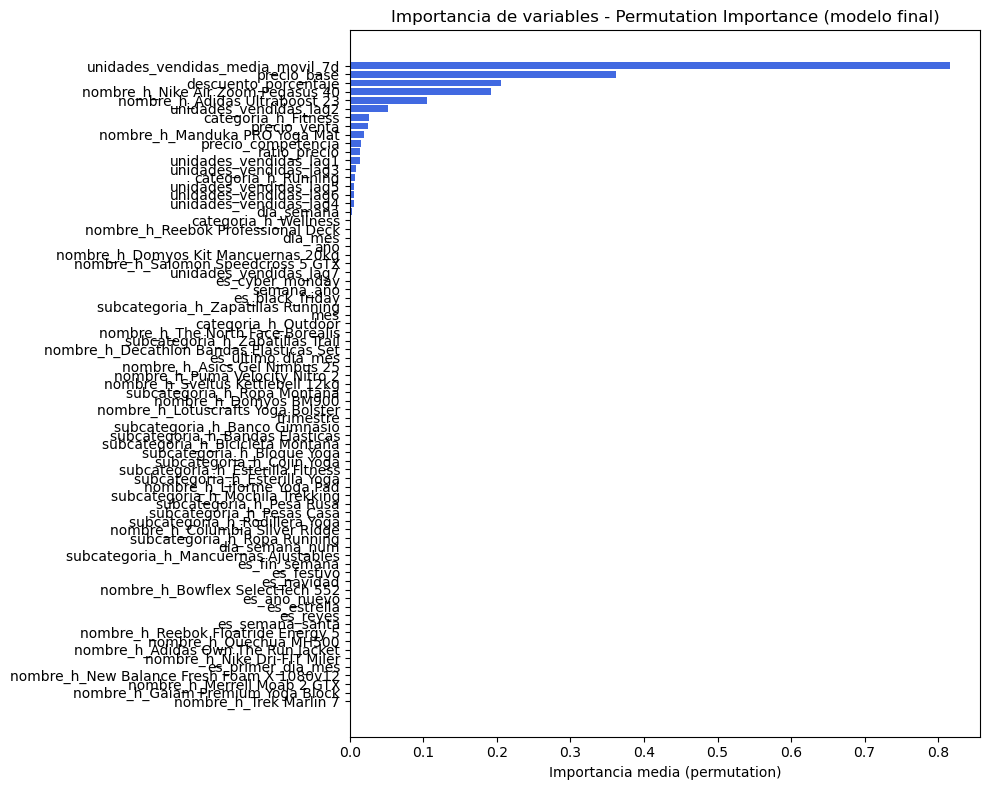

Modelo final guardado en models/modelo_final.joblib


In [27]:
# 🤖 Importancia de variables con permutation importance y guardado del modelo final
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import joblib

# Calcular permutation importance sobre el modelo final y los datos completos
result = permutation_importance(modelo_final, X_full, y_full, n_repeats=10, random_state=42, n_jobs=-1)

# Crear DataFrame con resultados
importancias = pd.DataFrame({
    'variable': X_full.columns,
    'importancia': result.importances_mean
})
importancias = importancias.sort_values('importancia', ascending=False)

# Gráfico de barras horizontales
plt.figure(figsize=(10,8))
plt.barh(importancias['variable'], importancias['importancia'], color='royalblue')
plt.xlabel('Importancia media (permutation)')
plt.title('Importancia de variables - Permutation Importance (modelo final)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# Guardar el modelo final en models/modelo_final.joblib
joblib.dump(modelo_final, '../models/modelo_final.joblib')
print('Modelo final guardado en models/modelo_final.joblib')
